In [37]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

##### https://keras.io/api/datasets/cifar10



In [38]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [39]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [40]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [41]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /255

In [42]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train.shape, y_test.shape

((50000,), (10000,))

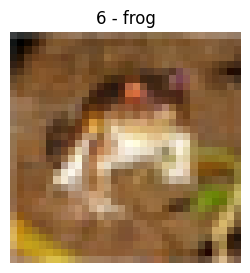

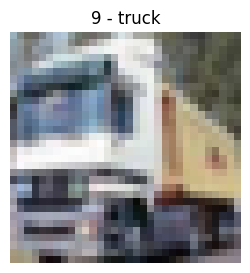

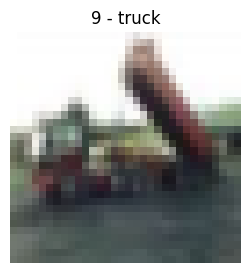

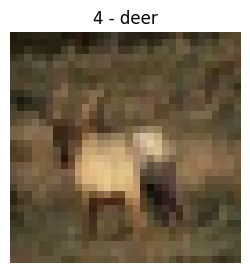

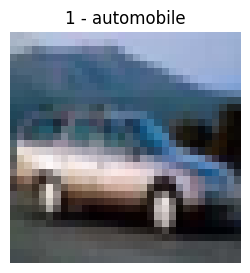

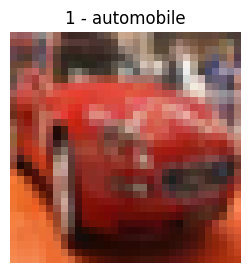

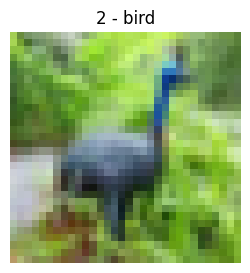

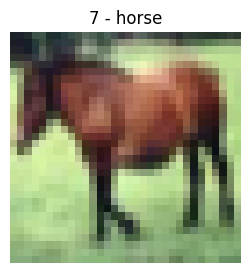

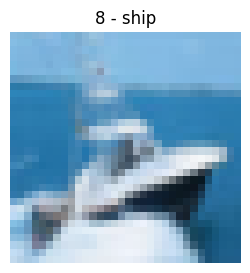

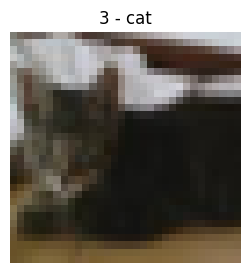

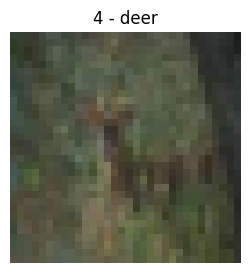

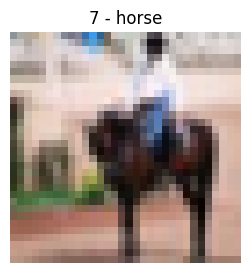

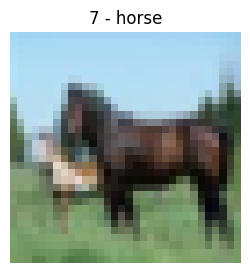

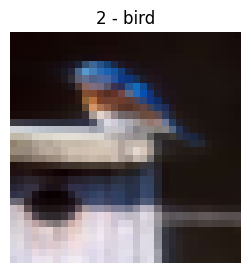

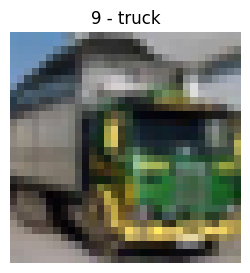

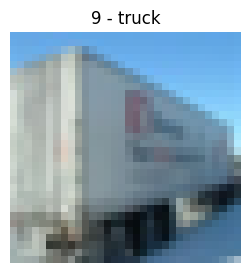

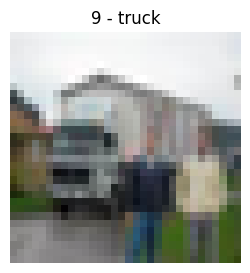

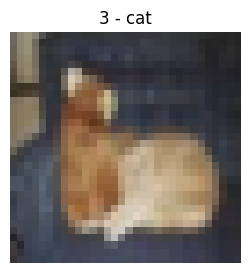

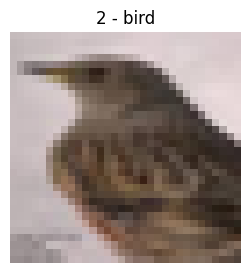

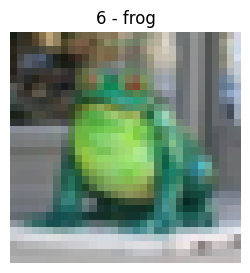

In [43]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(20):
    plt.figure(figsize=(3,3))
    plt.title(f'{y_train[i]} - {classes[y_train[i]]}')
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.show()

##### CNN: https://www.youtube.com/watch?v=zfiSAzpy9NM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=23

In [44]:
# Filter is like a Feature Detector

# After applying the filter in an image, it creates a Feature Map with a decreased shape (when padding = 'valid')

# The Feature Map + Max Pooling helps with an invariant feature in different locations of an image

# The feature map then goes through an activation function to introduce non-linearity and speed up computations

# Max pooling helps with reducing the shape of an image for computations

In [45]:
model = keras.Sequential([
    # CNN for feature extraction
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # NN for classification
    keras.layers.Flatten(),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(96,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(48,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_3 (Dropout)         (None, 8192)             

In [47]:
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 12s 5ms/step - loss: 1.6203 - accuracy: 0.4033
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2340 - accuracy: 0.5585
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0888 - accuracy: 0.6170
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9883 - accuracy: 0.6549
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9129 - accuracy: 0.6818
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8495 - accuracy: 0.7064
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7993 - accuracy: 0.7219
Epoch 8/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7512 - accuracy: 0.7398
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7032 - accuracy: 0.7571
Epoch 10/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.67

In [48]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9811 - accuracy: 0.7267


[0.9811488389968872, 0.7267000079154968]

In [49]:
probability = model.predict(X_test_scaled)
probability.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [50]:
yp_test = np.array([np.argmax(i) for i in probability])
yp_test

array([3, 8, 0, ..., 5, 1, 7])

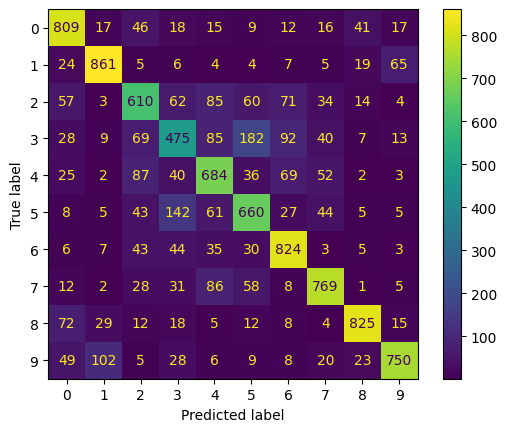

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yp_test)
display_cm = ConfusionMatrixDisplay(cm, display_labels=None)
display_cm.plot()

# View Model

In [52]:
layers = model.layers
layers

### Get name of each layer

In [53]:
layers[0].name

'conv2d_2'

### Get weights and bias of each layer

In [54]:
conv1_weights, conv1_bias = layers[0].get_weights()
conv1_weights.shape, conv1_bias.shape

((3, 3, 3, 64), (64,))

In [55]:
conv2_weights, conv2_bias = layers[2].get_weights()
conv2_weights.shape, conv2_bias.shape

((3, 3, 64, 128), (128,))

### Plot filters of each layer

In [56]:
# scale from 0 to 1 to plot
conv1_weights = (conv1_weights - conv1_weights.min()) / (conv1_weights.max() - conv1_weights.min())
conv2_weights = (conv2_weights - conv2_weights.min()) / (conv2_weights.max() - conv2_weights.min())

In [57]:
conv1_weights[:, :, :, 0].shape  # get first filter

(3, 3, 3)

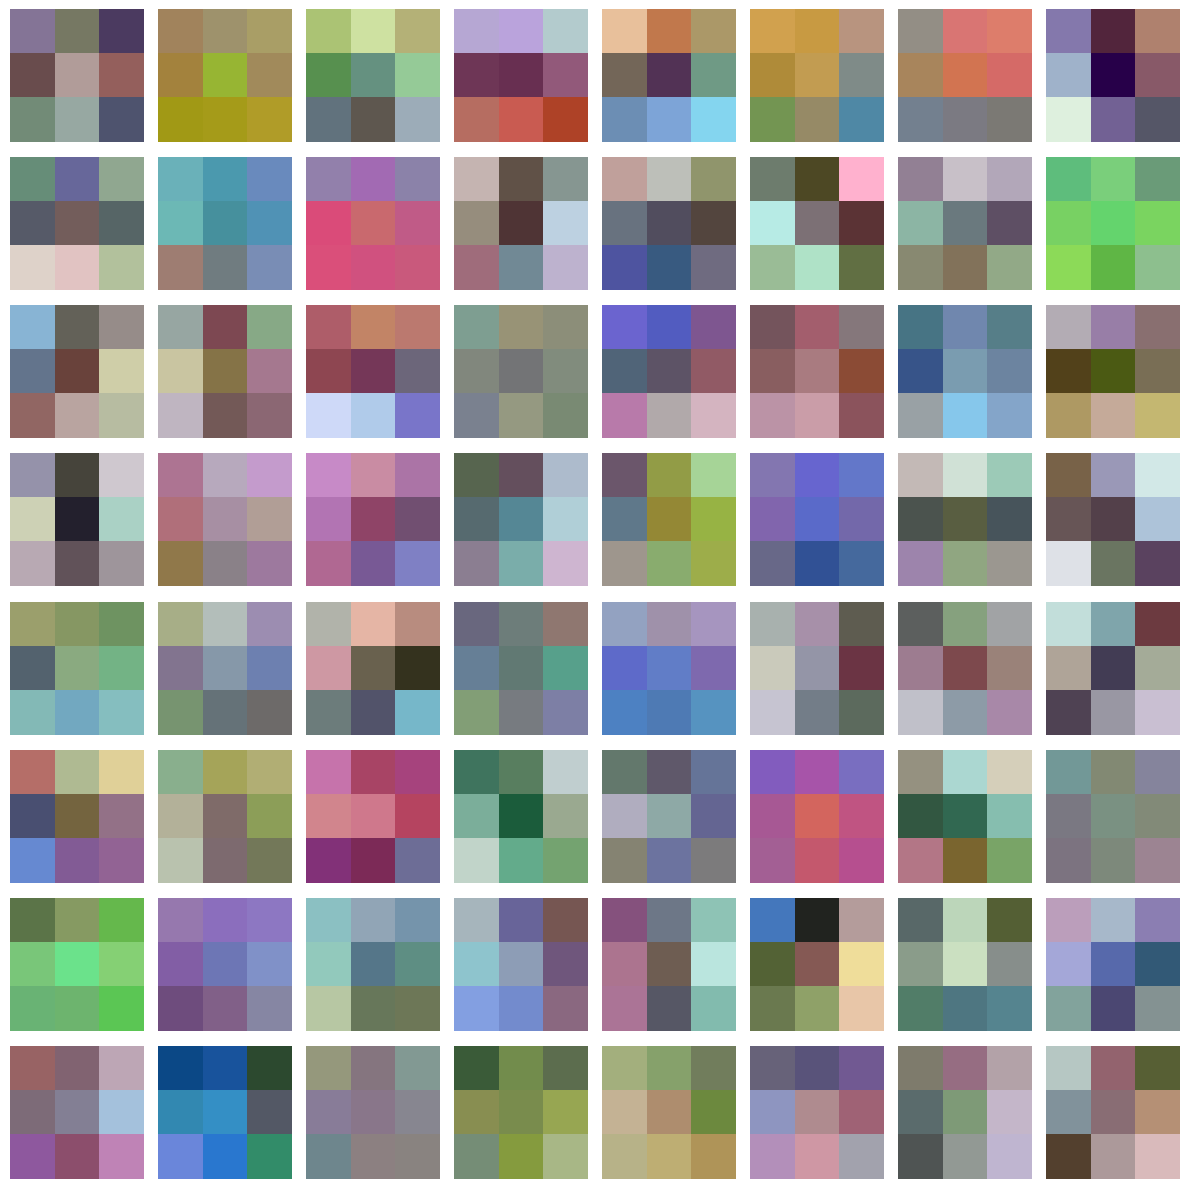

In [58]:
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
axes = axes.flatten()

for i in range(1, 8*8+1):
  filter = conv1_weights[:, :, :, i-1]  # (3x3x3x64)
  #red_filter = filter[:, :, 0]
  #green_filter = filter[:, :, 1]
  #blue_filter = filter[:, :, 2]

  axes[i-1].imshow(filter)  # show RGB filter
  axes[i-1].axis('off')

plt.tight_layout()
plt.show()

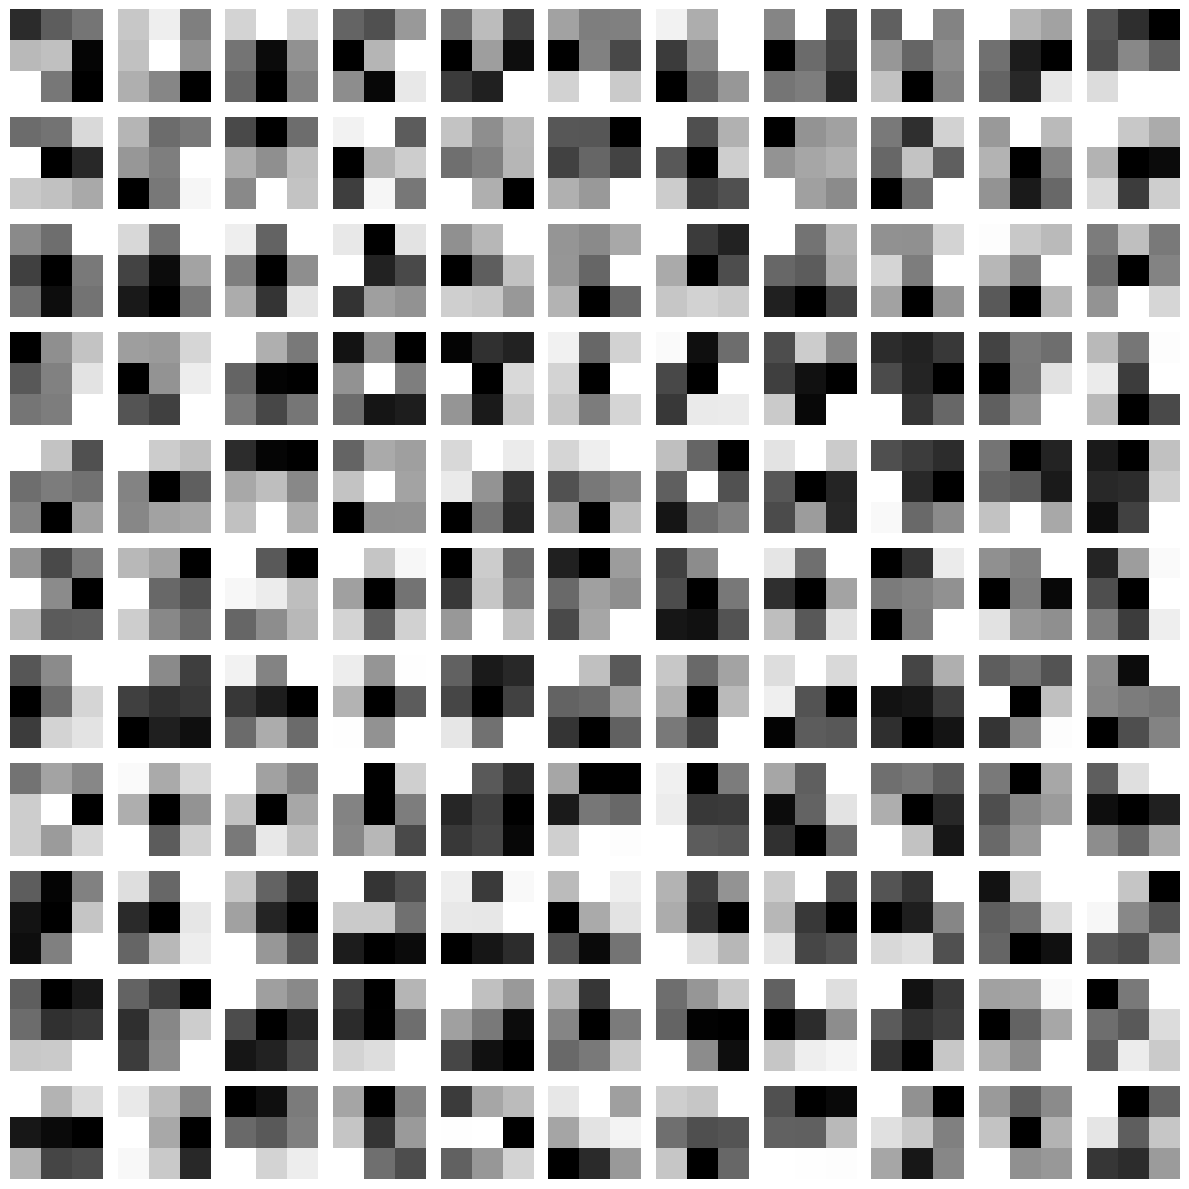

In [59]:
fig, axes = plt.subplots(11, 11, figsize=(12, 12))
axes = axes.flatten()

for i in range(1, 11*11+1):
  filter = conv2_weights[:, :, :, i-1]  # (3x3x64x128)
  filter = np.mean(filter, axis=2)  # j4f, this is bullshit!!!
  #red_filter = filter[:, :, 0]
  #green_filter = filter[:, :, 1]
  #blue_filter = filter[:, :, 2]

  axes[i-1].imshow(filter, cmap='gray')
  axes[i-1].axis('off')

plt.tight_layout()
plt.show()

### Plot feature maps of each layer of 1 sample

In [60]:
input_shape = layers[0].input
input_shape

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'input_2')>

In [61]:
feature_map_1 = layers[0].output
pooling_1 = layers[1].output
feature_map_1, pooling_1

(<KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'max_pooling2d_2')>)

In [62]:
feature_map_2 = layers[2].output
pooling_2 = layers[3].output
feature_map_2, pooling_2

(<KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'max_pooling2d_3')>)

In [63]:
output_shapes = [feature_map_1, pooling_1, feature_map_2, pooling_2]

In [64]:
pretrained_model = keras.models.Model(inputs=input_shape, outputs=output_shapes)
# take the weights, bias of layers of the pretrained-model
pretrained_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
Total params: 75648 (295.50 KB)
Trainable params: 75648 (29

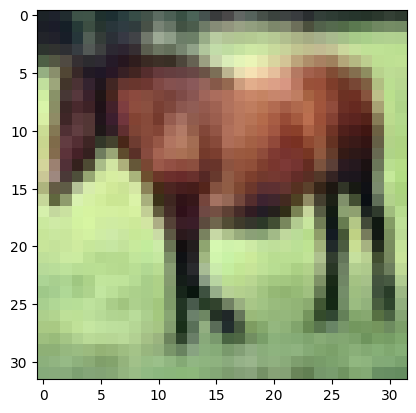

In [65]:
sample = X_train_scaled[7]
plt.imshow(sample)

In [66]:
print(sample.shape)
sample_ = np.expand_dims(sample, axis=0)
sample_.shape  # 1 to represent the training set contains only 1 sample

(32, 32, 3)


(1, 32, 32, 3)

In [67]:
sample_output = pretrained_model.predict(sample_)
print('length of sample_output:', len(sample_output))

1/1 [==============================] - 0s 61ms/step
length of sample_output: 4


In [68]:
sample_featureMap1 = sample_output[0]
sample_pooling1 = sample_output[1]
sample_featureMap2 = sample_output[2]
sample_pooling2 = sample_output[3]

sample_featureMap1.shape, sample_pooling1.shape, sample_featureMap2.shape, sample_pooling2.shape

((1, 32, 32, 64), (1, 16, 16, 64), (1, 16, 16, 128), (1, 8, 8, 128))

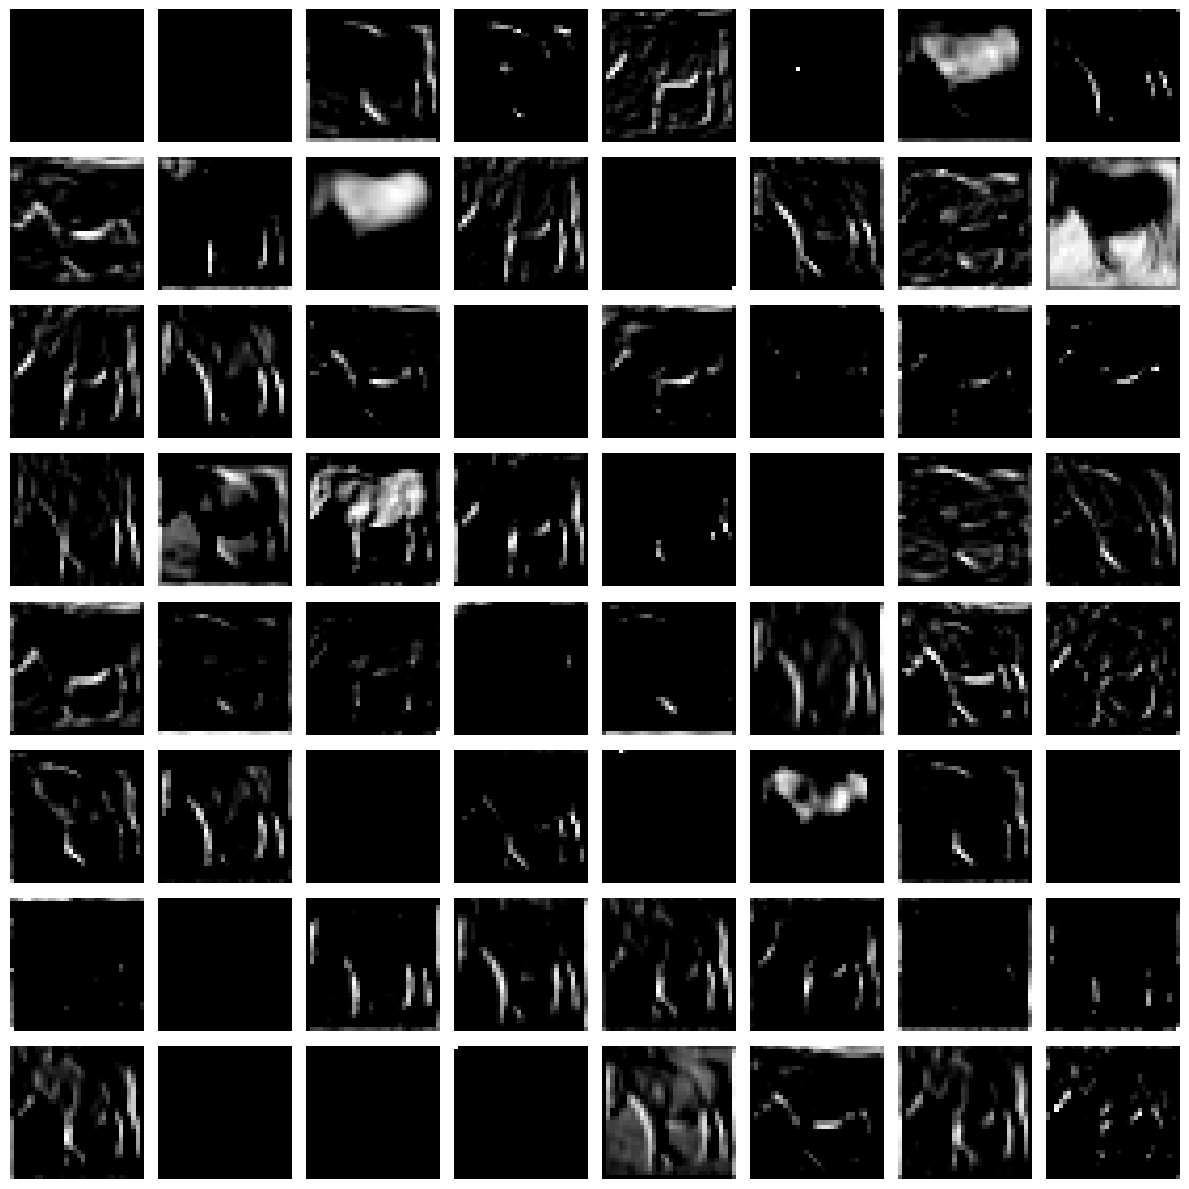

In [69]:
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
axes = axes.flatten()

for i in range(1, 8*8+1):
  feature_map = sample_featureMap1[0, :, :, i-1]

  axes[i-1].imshow(feature_map, cmap='gray')
  axes[i-1].axis('off')

plt.tight_layout()
plt.show()

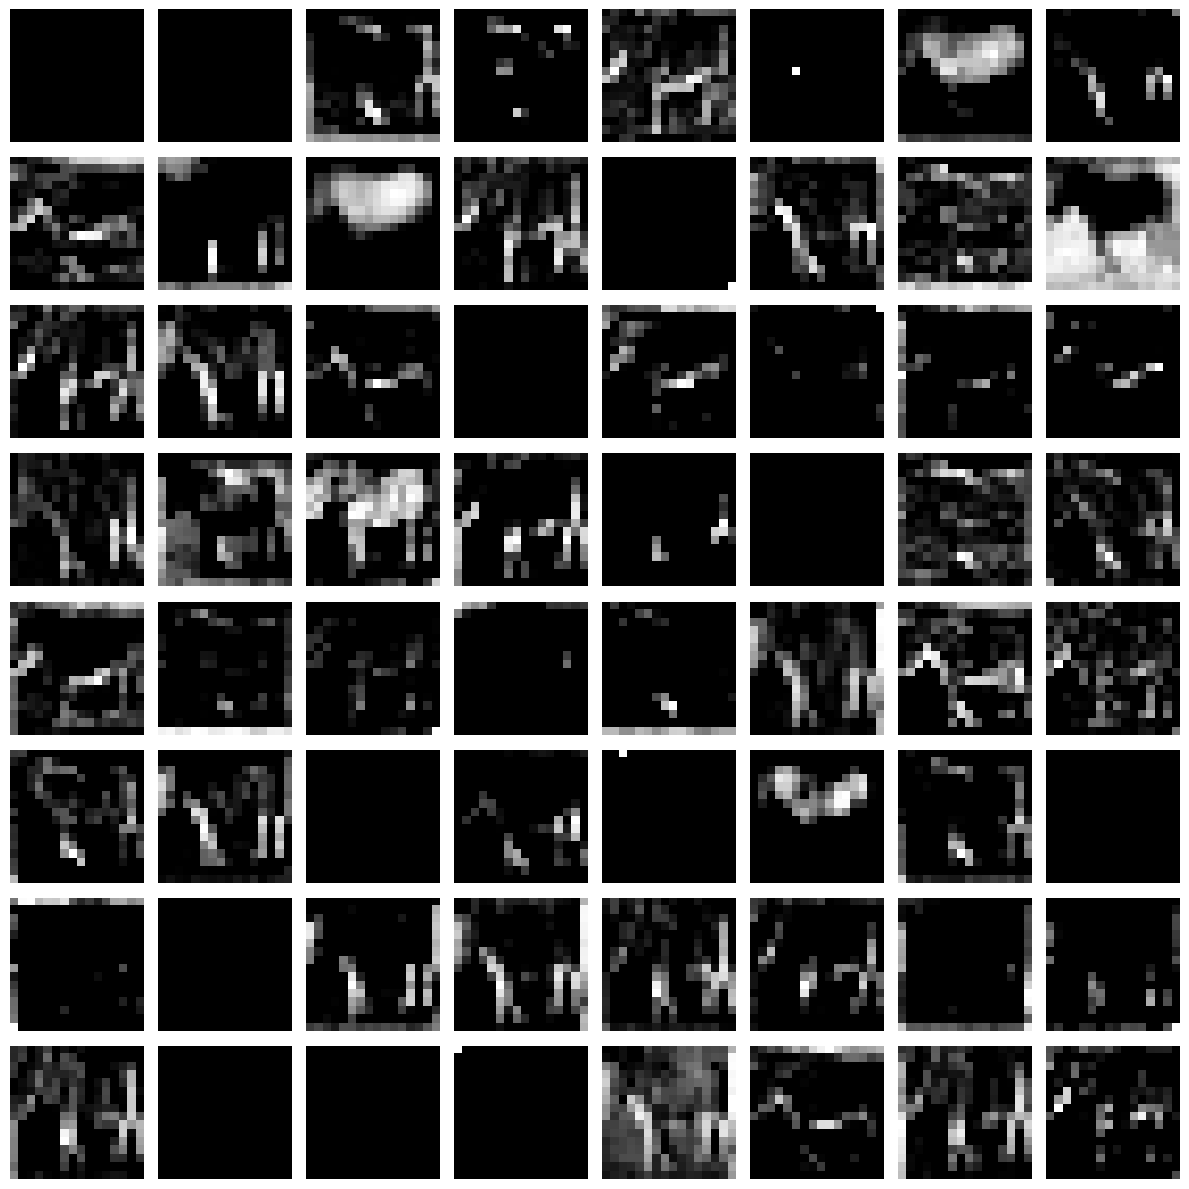

In [70]:
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
axes = axes.flatten()

for i in range(1, 8*8+1):
  pooling = sample_pooling1[0, :, :, i-1]

  axes[i-1].imshow(pooling, cmap='gray')
  axes[i-1].axis('off')

plt.tight_layout()
plt.show()

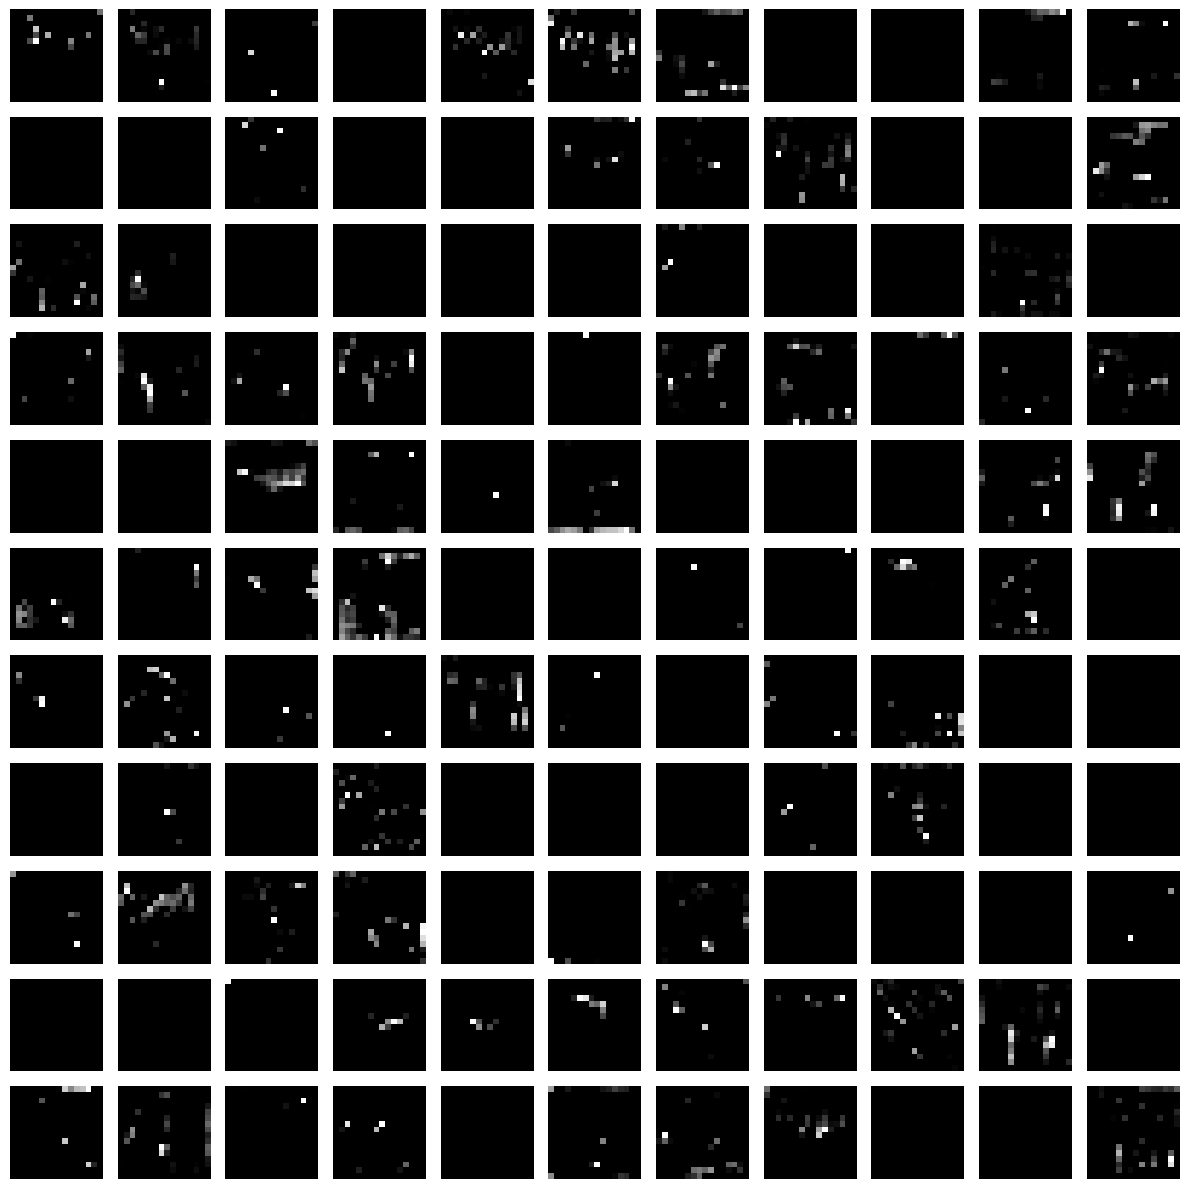

In [71]:
fig, axes = plt.subplots(11, 11, figsize=(12, 12))
axes = axes.flatten()

for i in range(1, 11*11+1):
  feature_map = sample_featureMap2[0, :, :, i-1]

  axes[i-1].imshow(feature_map, cmap='gray')
  axes[i-1].axis('off')

plt.tight_layout()
plt.show()

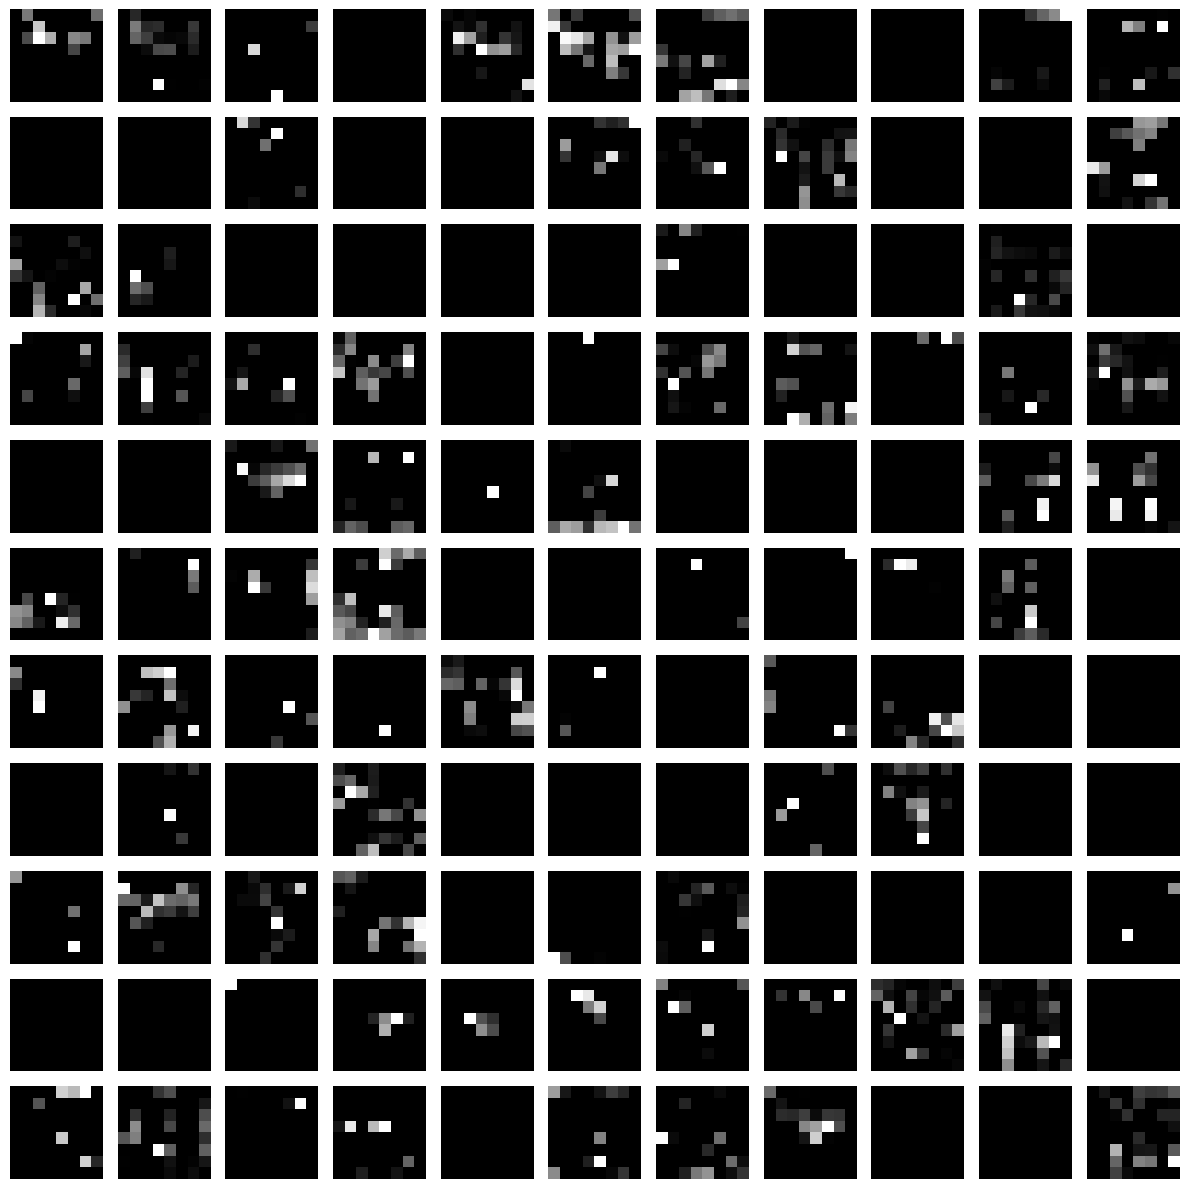

In [72]:
fig, axes = plt.subplots(11, 11, figsize=(12, 12))
axes = axes.flatten()

for i in range(1, 11*11+1):
  pooling = sample_pooling2[0, :, :, i-1]

  axes[i-1].imshow(pooling, cmap='gray')
  axes[i-1].axis('off')

plt.tight_layout()
plt.show()